# Проект: Приоритизация гипотез и анализ A/B-теста

# Описание проекта

Необходимо провести исследование в качестве аналитика крупного интернет-магазина. <br> 
Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Подготовительный этап

***Импорт библиотек:***

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import math as mth
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import seaborn as sns
register_matplotlib_converters() # конвертеры, которые позволяют использовать типы pandas в matplotlib

***Загрузка данных:***

***Данный раздел в портфолио пропущен во избежание нарушений связанных с интеллектуальной собственностью Яндекс Практикума.***

# Часть 1. Приоритизация гипотез

## 1.1 Условие

### Описание задачи

* Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по **убыванию приоритета**.
* Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по **убыванию приоритета**.
* Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. ***Объясните, почему так произошло***.

### Описание данных 

Файл ***/datasets/hypothesis.csv***: <br>
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по **10-балльной** шкале;
* `Impact` — влияние на пользователей по **10-балльной** шкале;
* `Confidence` — уверенность в гипотезе по **10-балльной** шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по **10-балльной** шкале. Чем **больше** значение `Efforts`, тем дороже проверка гипотезы.

### Подготовка данных

Приведем названия полей датафрейма к **snake_case**:

In [3]:
hypothesis = hypothesis.rename(columns={'Hypothesis' : 'hypothesis', 'Reach' : 'reach', 'Impact' : 'impact', 'Confidence' : 'confidence', 'Efforts' : 'efforts'})

## 1.2 Применение фреймворка `ICE`

***Для приоритизации гипотез сначала воспользуемся фреймворком ICE. Численный показатель данного фреймворка рассчитывается как (Impact * Confidence) / Efforts. Возьмем соответствующие показатели из таблицы hypothesis и рассчитаем ICE score:***

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

pd.options.display.max_colwidth = 50
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


In [5]:
pd.options.display.max_colwidth = 200 # Нашел решение на stackoverflow, есть ли способ лучше отобразить длинные строки текста?
display(hypothesis['hypothesis'])

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

***`Вывод`:*** <br>
Наиболее перспективные гипотезы по `ICE`: **8, 0, 7, 6**.

## 1.3 Применение фреймворка `RICE`

***Теперь воспользуемся модификацией фреймворка ICE - RICE. Рассчитаем RICE score, взяв данные из таблицы hypothesis, следующим образом: (Reach * Impact * Confidence) / Efforts:***

In [6]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

pd.options.display.max_colwidth = 50
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


***`Вывод`:*** <br>
Наиболее перспективные гипотезы по `RICE`: **7, 2, 0 и 6**.

## 1.4 Разница в приоритизации гипотез

Разница в приоритизации гипотез возникает из-за параметра `Reach`, который характеризует охват пользователей. Соответственно, у некоторых гипотез не такой большой охват, как у других, что сильно влияет на результат при расчете по фреймворку `RICE`

# Часть 2. Анализ A/B-теста

## 2.1 Условие

### Описание задачи

Вы провели **A/B-тест** и получили результаты, которые описаны в файлах ***/datasets/orders.csv*** и ***/datasets/visitors.csv***. <br>
Проанализируйте **A/B-тест**: <br>
`2.1.1` Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения; <br>
`2.1.2` Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения; <br>
`2.1.3` Постройте график относительного изменения кумулятивного среднего чека группы **B** к группе **A**. Сделайте выводы и предположения; <br>
`2.1.4` Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения; <br>
`2.1.5` Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения; <br>
`2.1.6` Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения; <br>
`2.1.7` Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей; <br>
`2.1.8` Постройте точечный график стоимостей заказов. Сделайте выводы и предположения; <br>
`2.1.9` Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов; <br>
`2.1.10` Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения; <br>
`2.1.11` Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения; <br>
`2.1.12` Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения; <br>
`2.1.13` Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения; <br>
`2.1.14` Примите решение по результатам теста и объясните его. Варианты решений:
* Остановить тест, зафиксировать победу одной из групп.
* Остановить тест, зафиксировать отсутствие различий между группами.
* Продолжить тест.

### Описание данных

Файл ***/datasets/orders.csv***: <br>
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа **A/B-теста**, в которую попал заказ. <br>

Файл ***/datasets/visitors.csv***: <br>
* `date` — дата;
* `group` — группа **A/B-теста**;
* `visitors` — количество пользователей в указанную дату в указанной группе **A/B-теста**

### Подготовка данных

#### ***Приводим дату к единому формату:***

In [7]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(orders.head(5))
print()
print(visitors.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B

        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


#### Производим предобработку данных

1. ***Проверяем датафрейм на пропуски и дубликаты.***

1.1 ***`orders.csv`***

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.duplicated().sum()

0

***`Вывод`:*** <br>
В датафрейме `orders.csv` дубликатов и пропусков не выявлено, все колонки приведены к регистру **snake_case**.

1.2 ***`visitors.csv`***

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.duplicated().sum()

0

***`Вывод`:*** <br>
В датафрейме `visitors.csv` дубликатов и пропусков не выявлено, все колонки приведены к регистру **snake_case**.

2. ***Проверяем корректность разбиения пользователей на группы.***

In [14]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

58 пользователей принадлежат обеим группам. Удалим этих пользователей из обеих групп:

In [15]:
ab_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group > 1')['visitorId'].unique()

orders = orders.query('visitorId not in @ab_users')

#### ***Создаем датафрейм `datesGroups` с уникальными парами значений `date` и `group` таблицы `orders`:***

In [16]:
datesGroups = orders[['date','group']].drop_duplicates() 

3) ***Объявляем переменную `ordersAggregated`, которая содержит:*** <br>
* дату;
* группу A/B теста;
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно.

In [17]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

#### ***Объявляем переменную `visitorsAggregated`, которая содержит:*** <br>
* дату;
* группу A/B теста;
* количество уникальных посетителей в группе теста по указанную дату включительно.

In [18]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#### ***Объединяем две предыдущие таблицы в одну методом merge() в переменной `cumulativeData`, присваиваем столбцам корректные названия:***

In [19]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


## 2.1.1 График кумулятивной выручки по группам

***Объявляем переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых содержатся данные о датах, выручке и числе заказов в группах A и B:***

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

***Строим графики кумулятивной выручки по группам:***

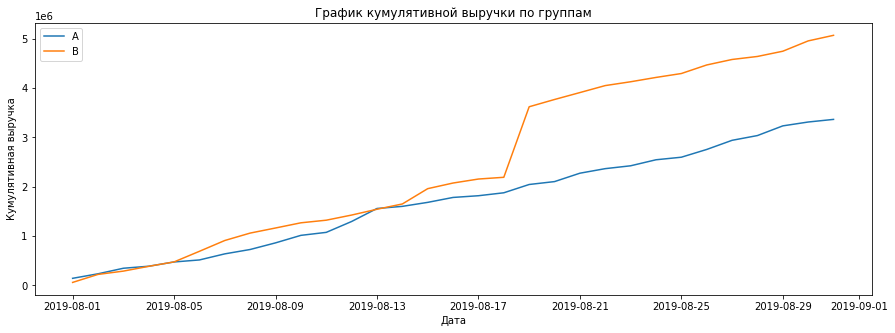

In [21]:
# Строим график кумулятивной выручки группы А
sns.lineplot(data=cumulativeRevenueA, x=cumulativeRevenueA['date'], y=cumulativeRevenueA['revenue'], label='A')

# Строим график кумулятивной выручки группы B
sns.lineplot(data=cumulativeRevenueB, x=cumulativeRevenueB['date'], y=cumulativeRevenueB['revenue'], label='B')

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.legend()
plt.show()

***`Вывод`:*** <br>
После **17 августа** виден резкий скачок в показателе кумулятивной выручки группы B. Возможно, имеют место аномально объемные заказы, которые сильно влияют на результаты теста.

## 2.1.2 График кумулятивного среднего чека по группам

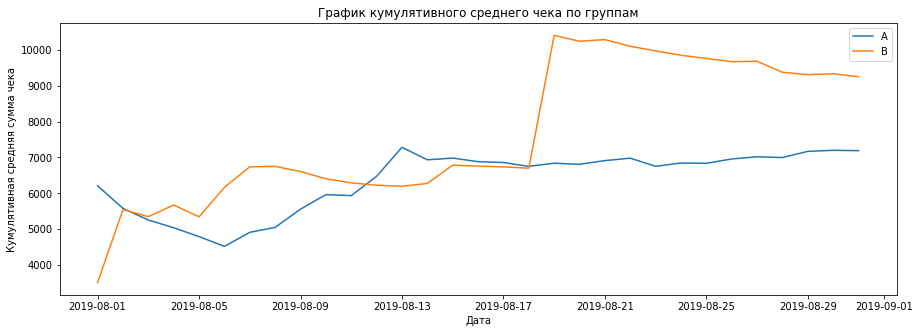

In [22]:
# Строим график кумулятивного среднего чека группы А
sns.lineplot(data=cumulativeRevenueA, x=cumulativeRevenueA['date'], y=cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график кумулятивного среднего чека группы B
sns.lineplot(data=cumulativeRevenueB, x=cumulativeRevenueB['date'], y=cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивная средняя сумма чека')
plt.xlabel('Дата')
plt.legend()
plt.show()

***`Вывод`:*** <br>
Аномальный рост в группе B по среднему чеку на этом графике заметен еще сильнее, соответственно, выводы делать нельзя до обработки возможных выбросов.

## 2.1.3 График относительного изменения кумулятивного среднего чека группы B к группе A

***Объединим таблицы `cumulativeRvenueA` и `cumulativeRevenueB` методом merge в одну таблицу, в которой содержатся столбцы `date`, `revenueA`, `revenueB`, `ordersA`, `ordersB` и сохраним ее в переменную `mergedCumulativeRevenue`:***

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

***Построим график относительного изменения кумулятивного среднего чека группы B к группе A по таблице из `mergedCumulativeRevenue`:***

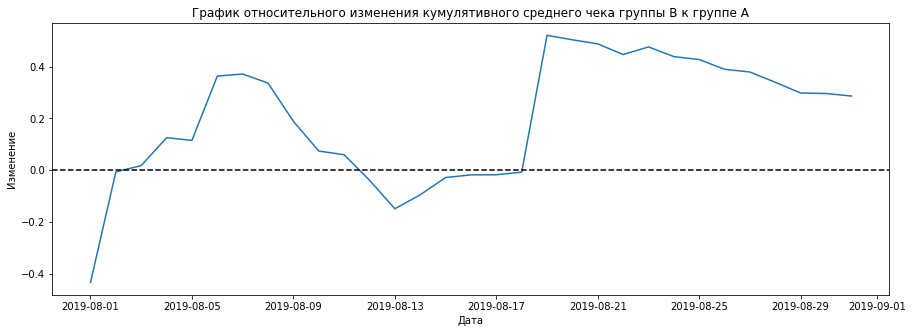

In [24]:
sns.lineplot(data=mergedCumulativeRevenue, x=mergedCumulativeRevenue['date'], y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

***`Вывод`:*** <br>
На данном графике прослеживаются скачки в определенные даты. Можно предположить, что аномальные заказы были совершены именно в эти даты.

## 2.1.4 График кумулятивного среднего количества заказов на посетителя по группам

***Добавим в таблицу `cumulativeData` столбец `conversion` с отношением числа заказов к количеству пользователей в указанной группе в указанный день, а также объявим переменные `cumulativeDataA` и `cumulativeDataB`, в которых сохранены данные о заказах в сегментах А и В соответственно:***

In [25]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

***Построим графики кумулятивного среднего количества заказов на посетителя по группам и по дням:***

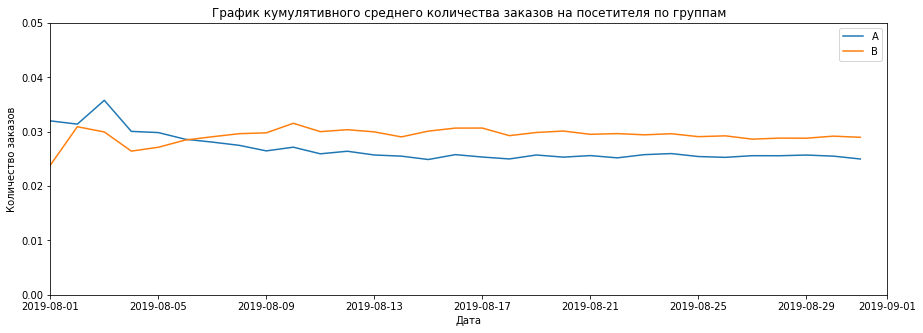

In [26]:
sns.lineplot(data=cumulativeDataA, x=cumulativeDataA['date'], y=cumulativeDataA['conversion'], label='A')
sns.lineplot(data=cumulativeDataB, x=cumulativeDataB['date'], y=cumulativeDataB['conversion'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.legend()
plt.show()

***`Вывод`:*** <br>
В начале теста группа А имела большее кумулятивное среднее количество заказов, но через полторы недели (около 2019-08-10) данный параметр выровнялся для группы В и зафиксировался на отметке выше группы А (выше примерно на половину сегмента). <br> 
Для графика масштаб был установлен таким образом, чтобы было видно, что абсолютное значение колебания кумулятивного среднего количества заказов в начале и конце теста совсем не большое - примерно от 3% до 3,75%, и что среднее количество заказов по группам установилось около своего среднего значения.   

## 2.1.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе А

***Объединим таблицы `cumulativeDataA` и `cumulativeDataB` методом merge(), сохраняем в переменную `mergedCumulativeConversions`:***

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

***Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А:***

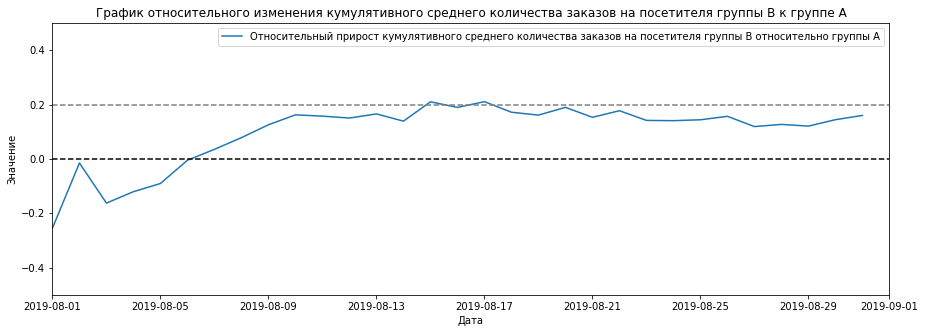

In [28]:
sns.lineplot(data=mergedCumulativeConversions, x=mergedCumulativeConversions['date'], y=mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.ylabel('Значение')
plt.xlabel('Дата')
plt.legend()
plt.show()

***`Вывод`:*** <br>
После небольшого проседания группа В стала лидировать по метрике. Пик пришелся на **2019-08-14** и продлился до **2019-08-17**, затем произошел небольшой спад, и прирост зафиксировался где-то на отметке 15% относительно группы А.

## 2.1.6 Точечный график количества заказов по пользователям

***Найдем число заказов по пользователям путем создания датафрейма `transactionsByVisitors` с двумя столбцами: `visitorId` и `transactions`:***

In [29]:
transactionsByVisitors = (
    orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
)

transactionsByVisitors.columns = ['visitorId', 'transactions']

print(transactionsByVisitors.sort_values(by='transactions', ascending=False).head(10)) 

      visitorId  transactions
908  3967698036             3
55    249864742             3
478  2108163459             3
687  2988190573             3
890  3908431265             3
138   611059232             3
632  2742574263             3
157   678354126             2
323  1404560065             2
452  1985475298             2


***Построим scatter-диаграмму распределения числа заказов по пользователям:***

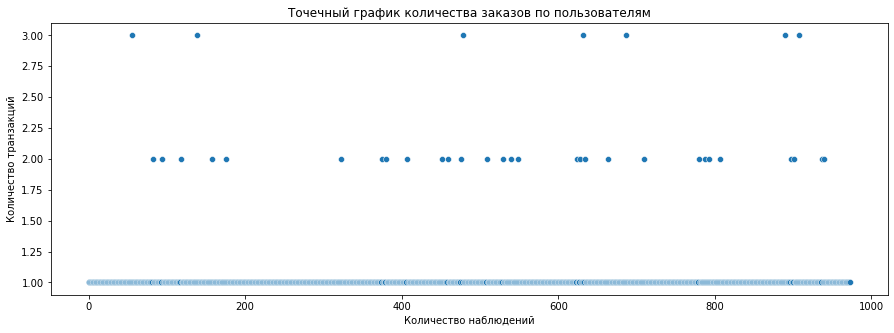

In [30]:
# x-values - сгенерированные номера наблюдений
x_values = pd.Series(range(0,len(transactionsByVisitors)))

#plt.scatter(x_values, transactionsByVisitors['transactions']) 

sns.scatterplot(data=transactionsByVisitors, x=x_values, y=transactionsByVisitors['transactions'])

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество транзакций')
plt.xlabel('Количество наблюдений')
plt.show()

***`Вывод`:*** <br>
На графике видно, что три заказа и более совершило относительно малое количество пользователей. Далее необходимо проверить, насколько редки такие случае, посчитав выборочные процентили.

## 2.1.7 Расчет 95-го и 99-го перцентилей количества заказов на пользователя

In [31]:
print(transactionsByVisitors.sort_values(by='transactions', ascending=False).head(10)) 
print()
# Добавляем 98-й процентиль, так как визуально по графику есть некоторое количество пользователей, которые оформляли 3 заказа
print(np.percentile(transactionsByVisitors['transactions'], [95, 97, 99])) 

      visitorId  transactions
908  3967698036             3
55    249864742             3
478  2108163459             3
687  2988190573             3
890  3908431265             3
138   611059232             3
632  2742574263             3
157   678354126             2
323  1404560065             2
452  1985475298             2

[1. 2. 2.]


***`Вывод`:*** <br>
Не более **5%** пользователей совершали больше **1 заказа**, не более **1%** и **3%** пользователей - больше **двух**. <br>
Так как пользователи, заказывавшие 2 и более заказа уже составляют незначительную группу относительно основной (~4%), устанавливаем верхнюю границу для определения аномальных пользователей на отметке `2 заказа`. 

## 2.1.8 Точечный график стоимостей заказов

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


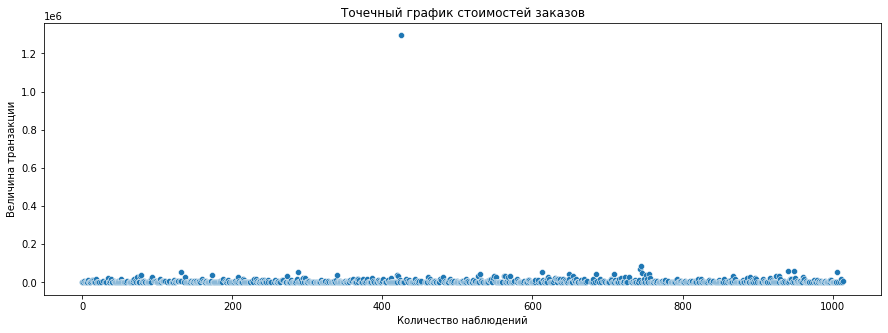

In [32]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))

sns.scatterplot(data=orders, x=x_values, y=orders['revenue'])

fig=plt.gcf()
fig.set_size_inches(15, 5)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Величина транзакции')
plt.xlabel('Количество наблюдений')
plt.show()

***`Вывод`:*** <br>
Заказов более **~70 000 рублей** достаточно мало. Присутствует выброс в отметке **~1 300 000 рублей**. Данный показатель является явной аномалией и сильно влияет на результаты теста, необходимо найти выборочные процентили и исключить аномалии из выборки.

## 2.1.9 Расчет 95-го и 99-го перцентилей стоимости заказов

In [33]:
print(np.percentile(orders['revenue'], [95, 97, 99])) 

[26785. 34792. 53904.]


***`Вывод`:*** <br>
Не более **5%** пользователей совершили транзакции на сумму более `26 786 рублей`, не более **3%** пользователей совершили транзакции на сумму более `34 792 рубля`, не более **1%** пользователей совершили транзакции на сумму более `53 904 рублей`.  
Устанавливаем верхнюю границу для определения аномальных заказов - `34 792 рубля`.

## 2.1.10 Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "сырым" данным

***Посчитаем статистическую значимость различий в среднем числе заказов на пользователя по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая (H0): различий в среднем количестве заказов между группами нет. Альтернативная (H1): различия в среднем между группами есть.***

***Создадим два датафрейма - `transactionsByVisitorsA` и `transactionsByVisitorsB`, с информацией о количестве заказов по пользователям групп А и В:***

In [34]:
transactionsByVisitorsA = (
    orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
)

transactionsByVisitorsA.columns = ['visitorId', 'transactions']

transactionsByVisitorsB = (
    orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
)

transactionsByVisitorsB.columns = ['visitorId', 'transactions']

print(transactionsByVisitorsA.head())
print()
print(transactionsByVisitorsB.head())

   visitorId  transactions
0   11685486             1
1   54447517             1
2   66685450             1
3   78758296             1
4   85103373             1

   visitorId  transactions
0    5114589             1
1    6958315             1
2   39475350             1
3   47206413             1
4   48147722             1


***Объявим переменные `sampleA` и `sampleB`, в которых пользователям с заказами соответствует число заказов пользователя, а пользователям без заказов — нули:*** 

In [35]:
sampleA = pd.concat(
    [
        transactionsByVisitorsA['transactions'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataA['visitors'].sum() - len(transactionsByVisitorsA['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        transactionsByVisitorsB['transactions'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataB['visitors'].sum() - len(transactionsByVisitorsB['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

***Посчитаем статистическую значимость различия среднего количества заказов по результатам теста с помощью теста Манна-Уитни, выведем p-value для сравнения среднего между группами, а также вычислим относительное различие в среднем между группами:***

In [36]:
print(f'p-value: '"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print(f'Относительное различие между группами:'"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.00958
Относительное различие между группами:0.166


***`Вывод`:*** <br>
По `сырым данным` p-value меньше 0.05, значит, отвергаем нулевую гипотезу в пользу альтернативной: ***есть различия в количестве заказов между группами А и В***. При этом относительный выигрыш группы В в числе заказов равен 16.6%

## 2.1.11 Расчет статистической значимости различий в среднем чеке заказа между группами по "сырым" данным

***Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.***

***Проведем те же действия, что были представлены в предыдущем пункте, со средними чеками групп:***

In [37]:
print(f'p-value:'"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие между группами:'"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value:0.829
Относительное различие между группами:0.287


***`Вывод`:*** <br>
По `сырым данным` p-value > 0.05, следовательно причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом полученное относительное различие между группами (25.9% в пользу группы В) ***не является статистически значимым***.

## 2.1.12 Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "очищенным" данным

***За аномальных пользователей были приняты те, кто `совершил от 3 заказов` или `совершил заказ дороже 35 500 рублей`. Сделаем срезы пользователей с числом заказом больше 2 - `visitorsWithManyTransactions` и пользователей, совершивших заказы дороже 35 500 рублей - `visitorsWithBigTransactions`. Объединим их в таблице `abnormalUsers`:***

In [38]:
visitorsWithManyTransactions = pd.concat(
    [
        transactionsByVisitorsA[transactionsByVisitorsA['transactions'] > 2]['visitorId'],
        transactionsByVisitorsB[transactionsByVisitorsB['transactions'] > 2]['visitorId'],
    ],
    axis=0,
)
revenue_lim = np.percentile(orders['revenue'], 97)
visitorsWithBigTransactions = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([visitorsWithManyTransactions, visitorsWithBigTransactions], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: visitorId, dtype: int64
38


***`Вывод`:*** <br>
Был выявлено `38 аномальных пользователей`. Далее необходимо посмотреть по "очищенным" данным, как действия этих пользователей повлияли на результаты теста.

***Рассчитаем статистическую значимость различий в среднем количестве заказов между группами теста по "очищенным" данным. Сначала создадим две выборки с отфильтрованными данными:***

In [39]:
sampleAFiltered = pd.concat(
    [
        transactionsByVisitorsA[
            np.logical_not(transactionsByVisitorsA['visitorId'].isin(abnormalUsers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataA['visitors'].sum() - len(transactionsByVisitorsA['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        transactionsByVisitorsB[
            np.logical_not(transactionsByVisitorsB['visitorId'].isin(abnormalUsers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataB['visitors'].sum() - len(transactionsByVisitorsB['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)



***Затем применим к ним статистический критерий Манна-Уитни:***

In [40]:
print(f'p-value:'"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print(f'Относительное различие между группами:'"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value:0.005
Относительное различие между группами:0.203


***`Вывод`:*** <br>
По `очищенным данным` p-value меньше 0.05, значит, отвергаем нулевую гипотезу в пользу альтернативной: ***есть различия в количестве заказов между группами А и В***. При этом относительный выигрыш группы В в числе заказов равен 20.3%

## 2.1.13 Расчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным

In [41]:
print(f'p-value:'
    "{0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(f'Относительное различие между группами:'
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value:0.918
Относительное различие между группами:0.016


***`Вывод`:*** <br>
По `очищенным данным` p-value > 0.05, следовательно причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное различие между группами уменьшилось до **1,6%**, что не является статистически значимой величиной. Следовательно, предположение о том, что аномальные данные сильно влияли на результаты теста, были верны, и аномалии необходимо было убрать.

## 2.1.14 Решение по результатам теста

***На данном этапе можно прийти к следующим заключениям:*** <br>
* Присутствует статистически значимое различие по среднему количеству заказов между группами по "сырым" и отфильтрованным данным, следовательно, результаты группы В улучшились по сравнению с группой А;
* Отсутствует статистически значимое различие по среднему чеку между группами и по "сырым" данным, и по отфильтрованным;
* График различия среднего количества заказов между группами показывает, что результаты группы В лучше группы А, и на данном этапе тестирования улучшение достигает ~18%;
* График различия среднего чека показывает рост группы В относительно группы А последние две недели тестирования, на данный момент рост достигает ~30%. Однако график сильно колеблется, главным образом из-за наличия аномалий, поэтому выводы на его основе делать нельзя. <br>

В связи с вышеуказанными заключениями, можно сделать вывод о возможности **остановить тест и зафиксировать победу группы В**, а также перейти к тестированию следующей гипотезы.